In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error

#**a)Visualization using pairplot**

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367
...,...,...,...,...,...,...,...
185,0.894296,-1.270097,4.618647,4.005702,4.634847,0.156118,-0.215169
186,0.926559,-1.203508,4.766199,3.907673,4.538084,0.073321,-0.197924
187,1.678706,-1.227245,5.613809,2.864530,4.046335,-0.906304,-0.099063
188,1.693254,-1.323340,5.470576,3.023584,4.208331,-0.693895,-0.189082


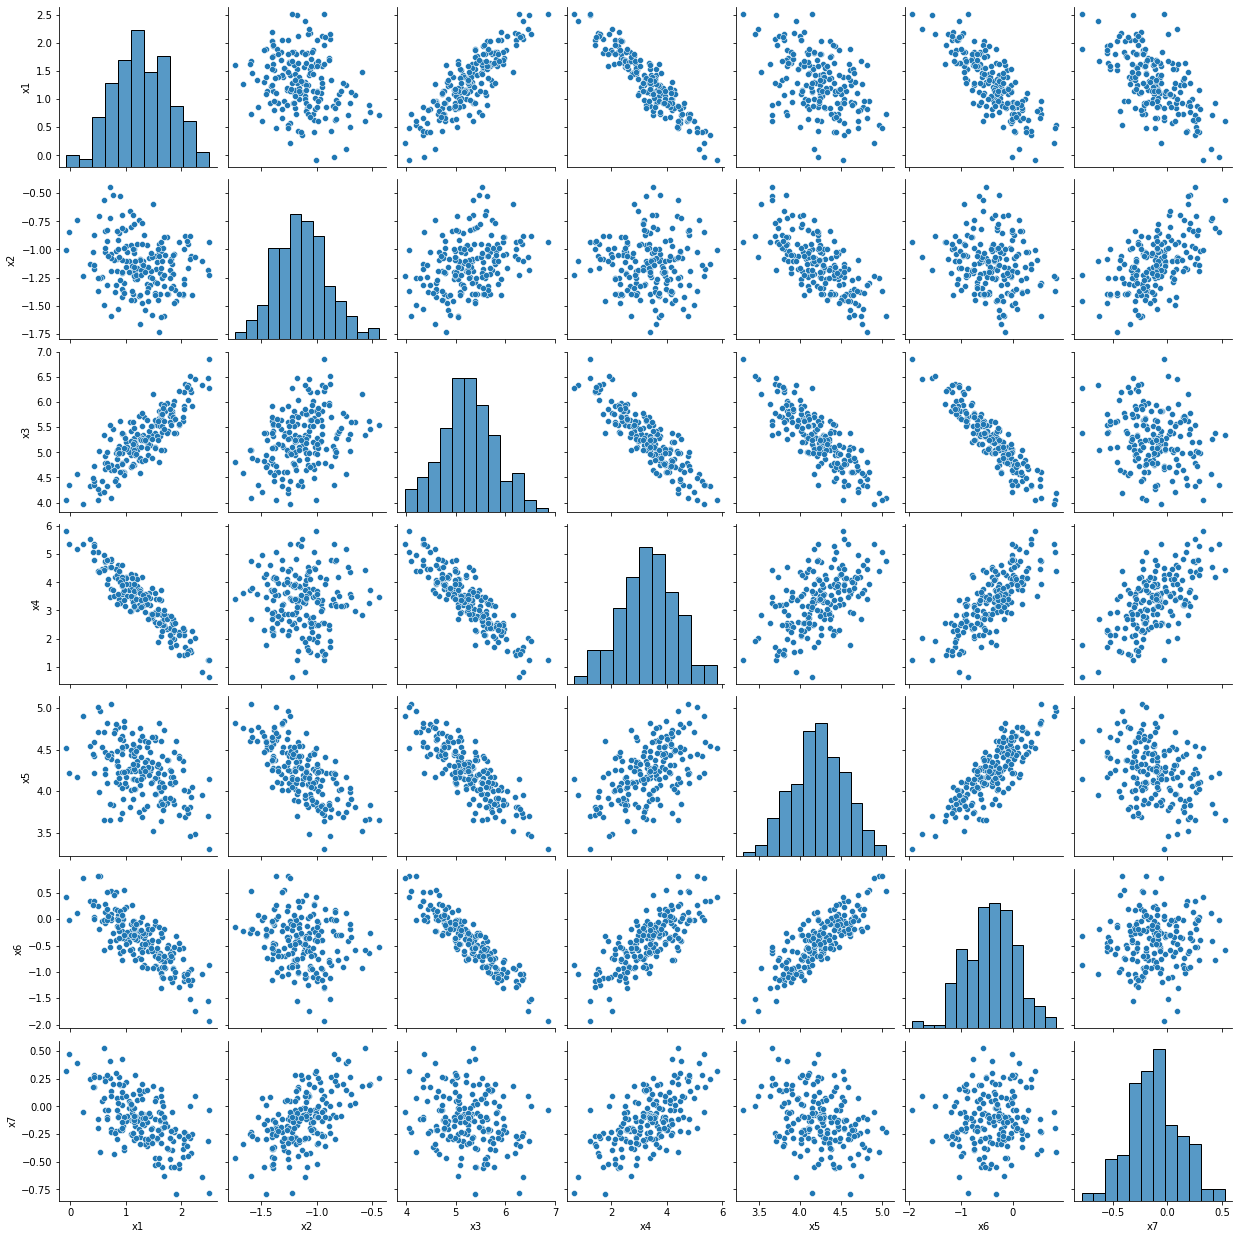

In [ ]:
url='https://www.ee.iitb.ac.in/~asethi/Dump/DataPCA.csv'
df = pd.read_csv(url)
display(df)
sns.pairplot(df)
df=np.asarray(df)


#**b)Train PCA** & **c)Plot variance** 


[1.69253305e+00 2.32754466e-01 6.51281155e-02 1.33872620e-02
 1.78158589e-04 3.15650063e-05 3.42504776e-06]


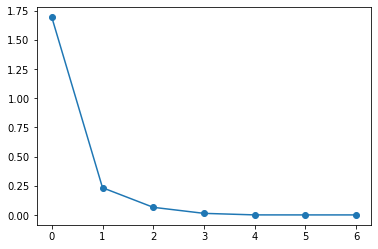

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pca = PCA(n_components=7)
pca.fit(df)
print(pca.explained_variance_)

plt.plot(pca.explained_variance_)
plt.scatter([0,1,2,3,4,5,6],pca.explained_variance_)
plt.show()

#**d)Reconstruct and MSE**

In [ ]:
for i in range(1,8):
  pca = PCA(n_components=i)
  pca.fit(df)
  df_reduced = np.dot(df, pca.components_.T) # transform
  df_original = np.dot(df_reduced, pca.components_) # inverse_transform

  #display(pd.DataFrame(df_original))

  print("components=",i," mean_squarred_error=",mean_squared_error(df,df_original))


components= 1  mean_squarred_error= 8.557899809507845
components= 2  mean_squarred_error= 8.524666085426869
components= 3  mean_squarred_error= 7.216172736179466
components= 4  mean_squarred_error= 4.591342414448131
components= 5  mean_squarred_error= 4.535899926153519
components= 6  mean_squarred_error= 0.6198027348159892
components= 7  mean_squarred_error= 9.897424393135832e-30


#**Comments and Insights**
1)As the dimension increases the error decreases and the most suitable dimension reduction dimension is 4 where the MSE significantly drops from 8 to 4.5.

2)From the variance explained graph also after dimension 4 the variance is almost zero.

3)data Centering is performed by scikit learn. 